In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Import API key
#from api_keys import geoapify_key


In [2]:
# Specify the path to your CSV file
csvpath = 'Resources/reduced.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(csvpath)
data_df = pd.DataFrame(data)
# Display the DataFrame
data_df


,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,357091,Texas,Female,Very good,0.0,30.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.65,58.97,21.63,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
1,199859,Minnesota,Female,Good,6.0,25.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.55,56.70,23.62,Yes,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",Yes,No
2,347964,Texas,Female,Good,10.0,20.0,Within past year (anytime less than 12 months ...,Yes,12.0,"6 or more, but not all",...,1.60,61.23,23.91,Yes,No,No,Yes,"Yes, received Tdap",No,No
3,407343,Washington,Female,Fair,0.0,19.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,...,1.57,NaN,NaN,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
4,211281,Mississippi,Male,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.85,95.25,27.71,Yes,No,Yes,No,"Yes, received tetanus shot, but not Tdap",No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111278,179391,Massachusetts,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.70,74.84,25.84,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
111279,36107,California,Female,Excellent,0.0,0.0,5 or more years ago,Yes,8.0,None of them,...,1.75,65.77,21.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111280,407783,Washington,Female,Good,0.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.65,68.04,24.96,No,Yes,No,No,"Yes, received Tdap",No,No
111281,417600,West Virginia,Female,Good,0.0,10.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,...,1.55,52.16,21.73,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
print(data_df.columns)

Index(['Unnamed: 0', 'State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [4]:
#Remove unneeded columns
cleaned_data_df=data_df[['Sex','GeneralHealth', 'ECigaretteUsage','SmokerStatus']]
cleaned_data_df

,Sex,GeneralHealth,ECigaretteUsage,SmokerStatus
0,Female,Very good,NaN,Never smoked
1,Female,Good,Use them every day,Current smoker - now smokes some days
2,Female,Good,Never used e-cigarettes in my entire life,Never smoked
3,Female,Fair,Never used e-cigarettes in my entire life,Former smoker
4,Male,Very good,Never used e-cigarettes in my entire life,Never smoked
...,...,...,...,...
111278,Male,Excellent,Not at all (right now),Never smoked
111279,Female,Excellent,Not at all (right now),Current smoker - now smokes some days
111280,Female,Good,Never used e-cigarettes in my entire life,Never smoked
111281,Female,Good,Never used e-cigarettes in my entire life,Former smoker


In [5]:
#Check for columns with 'Nan' values
non_nan_counts = cleaned_data_df.count()
print(non_nan_counts)

Sex                111283
GeneralHealth      111004
ECigaretteUsage    102452
SmokerStatus       102501
dtype: int64


In [6]:
#Remove 'Nan' values from data
cleaned_data2_df=cleaned_data_df.dropna()
cleaned_data2_df

,Sex,GeneralHealth,ECigaretteUsage,SmokerStatus
1,Female,Good,Use them every day,Current smoker - now smokes some days
2,Female,Good,Never used e-cigarettes in my entire life,Never smoked
3,Female,Fair,Never used e-cigarettes in my entire life,Former smoker
4,Male,Very good,Never used e-cigarettes in my entire life,Never smoked
5,Female,Very good,Not at all (right now),Never smoked
...,...,...,...,...
111278,Male,Excellent,Not at all (right now),Never smoked
111279,Female,Excellent,Not at all (right now),Current smoker - now smokes some days
111280,Female,Good,Never used e-cigarettes in my entire life,Never smoked
111281,Female,Good,Never used e-cigarettes in my entire life,Former smoker


In [7]:
#Make sure 'Nan' values are removed
non_nan_counts = cleaned_data2_df.count()
print(non_nan_counts)

Sex                101534
GeneralHealth      101534
ECigaretteUsage    101534
SmokerStatus       101534
dtype: int64


In [8]:
cleaned_data2_df['ECigaretteUsage'].unique()

array(['Use them every day', 'Never used e-cigarettes in my entire life',
       'Not at all (right now)', 'Use them some days'], dtype=object)

In [9]:
cleaned_data2_df['SmokerStatus'].unique()

array(['Current smoker - now smokes some days', 'Never smoked',
       'Former smoker', 'Current smoker - now smokes every day'],
      dtype=object)

In [10]:
ED_df = cleaned_data2_df[
    (cleaned_data2_df['ECigaretteUsage'] == 'Use them every day') | 
    (cleaned_data2_df['ECigaretteUsage'] == 'Use them some days')
]
ED_df

,Sex,GeneralHealth,ECigaretteUsage,SmokerStatus
1,Female,Good,Use them every day,Current smoker - now smokes some days
13,Male,Very good,Use them every day,Never smoked
23,Male,Good,Use them some days,Current smoker - now smokes some days
42,Male,Good,Use them some days,Current smoker - now smokes every day
121,Male,Excellent,Use them some days,Current smoker - now smokes some days
...,...,...,...,...
111142,Male,Poor,Use them some days,Former smoker
111162,Male,Good,Use them every day,Former smoker
111167,Male,Very good,Use them some days,Never smoked
111172,Female,Fair,Use them some days,Never smoked


In [11]:
ED_df_2 = ED_df[ED_df['SmokerStatus'] == 'Never smoked']
ED_df_2

,Sex,GeneralHealth,ECigaretteUsage,SmokerStatus
13,Male,Very good,Use them every day,Never smoked
168,Male,Very good,Use them every day,Never smoked
190,Female,Fair,Use them every day,Never smoked
268,Female,Very good,Use them every day,Never smoked
334,Female,Very good,Use them every day,Never smoked
...,...,...,...,...
111009,Male,Very good,Use them every day,Never smoked
111092,Male,Very good,Use them some days,Never smoked
111129,Male,Very good,Use them some days,Never smoked
111167,Male,Very good,Use them some days,Never smoked


In [12]:
Health_count = ED_df_2.groupby('GeneralHealth').size().reset_index(name='Count')
Health_count

,GeneralHealth,Count
0,Excellent,299
1,Fair,189
2,Good,518
3,Poor,41
4,Very good,591


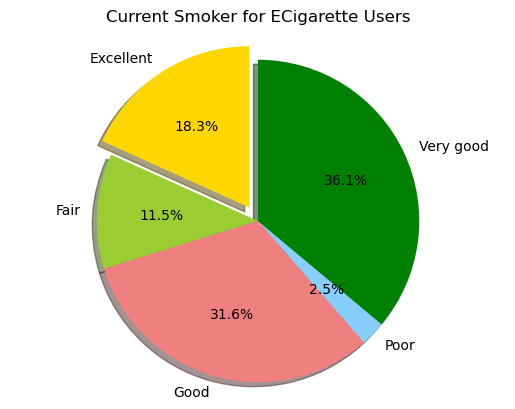

In [20]:
# Data for the pie chart
labels = Health_count['GeneralHealth']
sizes = Health_count['Count']

# Define colors for each segment (you can modify this to match your categories)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'green']

# Define explode effect for the first slice (i.e., the first segment of the pie chart)
explode = (0.1, 0, 0, 0, 0)  # Explode the first slice

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title of the chart
plt.title('Current Smoker for ECigarette Users')
plt.savefig('Current Smoker for ECigarette Users', dpi=300)

# Display the pie chart
plt.show()

In [21]:
ED_df_3 = cleaned_data2_df[cleaned_data2_df['ECigaretteUsage'] == 'Never used e-cigarettes in my entire life']
ED_df_3

,Sex,GeneralHealth,ECigaretteUsage,SmokerStatus
2,Female,Good,Never used e-cigarettes in my entire life,Never smoked
3,Female,Fair,Never used e-cigarettes in my entire life,Former smoker
4,Male,Very good,Never used e-cigarettes in my entire life,Never smoked
6,Female,Good,Never used e-cigarettes in my entire life,Never smoked
7,Female,Good,Never used e-cigarettes in my entire life,Never smoked
...,...,...,...,...
111275,Male,Very good,Never used e-cigarettes in my entire life,Never smoked
111276,Female,Good,Never used e-cigarettes in my entire life,Never smoked
111280,Female,Good,Never used e-cigarettes in my entire life,Never smoked
111281,Female,Good,Never used e-cigarettes in my entire life,Former smoker


In [22]:
ED_df_4 = ED_df_3[
    (ED_df_3['SmokerStatus'] == 'Current smoker - now smokes some days') | 
    (ED_df_3['SmokerStatus'] == 'Current smoker - now smokes every day')
]
ED_df_4

,Sex,GeneralHealth,ECigaretteUsage,SmokerStatus
9,Female,Good,Never used e-cigarettes in my entire life,Current smoker - now smokes every day
37,Male,Fair,Never used e-cigarettes in my entire life,Current smoker - now smokes every day
44,Female,Good,Never used e-cigarettes in my entire life,Current smoker - now smokes every day
100,Male,Very good,Never used e-cigarettes in my entire life,Current smoker - now smokes some days
139,Male,Good,Never used e-cigarettes in my entire life,Current smoker - now smokes some days
...,...,...,...,...
111214,Female,Fair,Never used e-cigarettes in my entire life,Current smoker - now smokes every day
111224,Male,Good,Never used e-cigarettes in my entire life,Current smoker - now smokes every day
111232,Female,Good,Never used e-cigarettes in my entire life,Current smoker - now smokes every day
111265,Male,Very good,Never used e-cigarettes in my entire life,Current smoker - now smokes every day


In [23]:
Health_count_1 = ED_df_4.groupby('GeneralHealth').size().reset_index(name='Count')
Health_count_1

,GeneralHealth,Count
0,Excellent,623
1,Fair,1237
2,Good,2026
3,Poor,501
4,Very good,1514


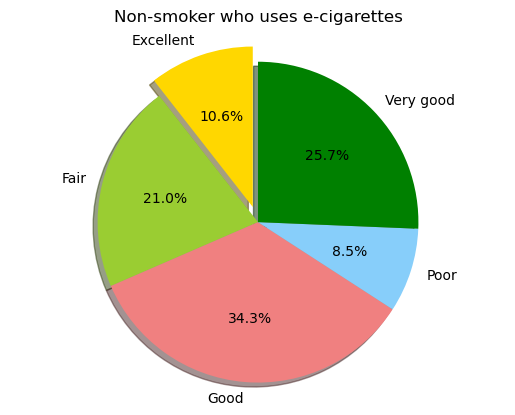

In [24]:
# Data for the pie chart
labels = Health_count_1['GeneralHealth']
sizes = Health_count_1['Count']

# Define colors for each segment (you can modify this to match your categories)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'green']

# Define explode effect for the first slice (i.e., the first segment of the pie chart)
explode = (0.1, 0, 0, 0, 0)  # Explode the first slice

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title of the chart
plt.title('Non-smoker who uses e-cigarettes')
plt.savefig('non_smoker_ecigarette_users.png', dpi=300)
# Display the pie chart
plt.show()

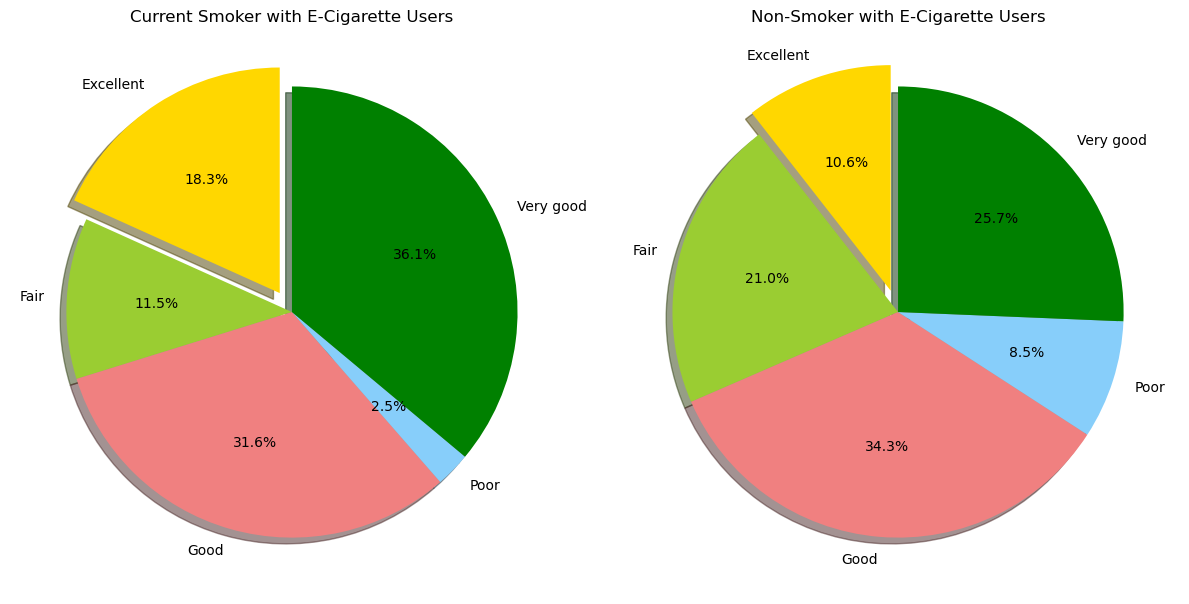

In [26]:
# Data for smokers
labels_smokers = Health_count['GeneralHealth']
sizes_smokers = Health_count['Count']

# Data for non-smokers
labels_nonsmokers = Health_count_1['GeneralHealth']
sizes_nonsmokers = Health_count_1['Count']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Current Smoker Pie Chart
axes[0].pie(sizes_smokers, explode=explode, labels=labels_smokers, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title('Current Smoker with E-Cigarette Users')

# Non-Smoker Pie Chart
axes[1].pie(sizes_nonsmokers, explode=explode, labels=labels_nonsmokers, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title('Non-Smoker with E-Cigarette Users')

plt.tight_layout()
plt.show()

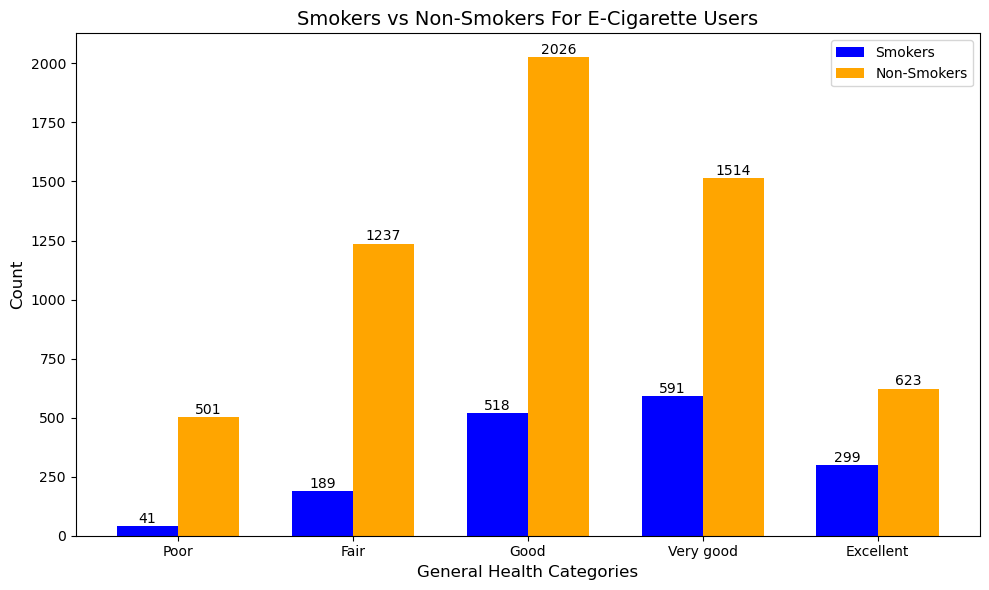

In [32]:
#cluster bar plot
# Ensure data is in list format
labels_smokers = Health_count['GeneralHealth'].tolist()  # Categories for smokers
sizes_smokers = Health_count['Count'].tolist()  # Counts for smokers

labels_nonsmokers = Health_count_1['GeneralHealth'].tolist()  # Categories for non-smokers
sizes_nonsmokers = Health_count_1['Count'].tolist()  # Counts for non-smokers

# Ensure both datasets have the same order of categories
assert labels_smokers == labels_nonsmokers, "Categories must match for comparison"

# Define the desired order for the General Health categories
ordered_categories = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

# Sort sizes according to the ordered categories
sizes_smokers_sorted = [sizes_smokers[labels_smokers.index(cat)] for cat in ordered_categories]
sizes_nonsmokers_sorted = [sizes_nonsmokers[labels_nonsmokers.index(cat)] for cat in ordered_categories]

# Define x positions
x = np.arange(len(ordered_categories))  # Positions for categories
bar_width = 0.35  # Width of each bar

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add smoker and non-smoker bars
ax.bar(x - bar_width / 2, sizes_smokers_sorted, bar_width, label='Smokers', color='blue')
ax.bar(x + bar_width / 2, sizes_nonsmokers_sorted, bar_width, label='Non-Smokers', color='orange')

# Add labels and title
ax.set_xlabel('General Health Categories', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Smokers vs Non-Smokers For E-Cigarette Users', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(ordered_categories)  # Apply ordered categories to x-axis
ax.legend()

# Add values on top of the bars
for i in range(len(sizes_smokers_sorted)):
    ax.text(x[i] - bar_width / 2, sizes_smokers_sorted[i] + 1, str(sizes_smokers_sorted[i]), ha='center', va='bottom', fontsize=10)
    ax.text(x[i] + bar_width / 2, sizes_nonsmokers_sorted[i] + 1, str(sizes_nonsmokers_sorted[i]), ha='center', va='bottom', fontsize=10)

# Save the plot as a PNG file
plt.savefig('smokers_vs_nonsmokers_health_comparison_sorted.png', dpi=300)

# Adjust layout and show plot
plt.tight_layout()
plt.show()